In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump,load
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from scipy.optimize import curve_fit
from scipy.stats import pearsonr


plt.rcParams['font.size']=15
plt.rcParams['axes.titlesize']='large'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['axes.labelsize']='large'
plt.rcParams['figure.dpi']=300

In [29]:
def get_evaluate(true,pred):
    return R2(true,pred),MAE(true,pred),MSE(true,pred),pearsonr(true,pred)[0]

def test_line(axlim,dex):
    x=np.arange(axlim[0],axlim[1],1/100)
    l1=x+dex
    l2=x-dex
    return x,l1,l2

def linear(x,k,b):
    return k*x+b

In [70]:
MELA_all_tot=load('trained-model/MELA_ALL--tot.joblib')
MELA_all_DM=load('trained-model/MELA_ALL--DM.joblib')

In [60]:
file_loc='example-data/'
spider=pd.read_csv(file_loc+'spider.csv')
DynPop=pd.read_csv(file_loc+'DynPop.csv')
Fornax=pd.read_csv(file_loc+'Fornax.csv')

In [61]:
DynPop_nETGs=DynPop.query('TYPE==\'nETGs\'').copy()
DynPop_LTGs=DynPop.query('TYPE==\'LTGs\'').copy()

Fornax_small=Fornax.query('TYPE==\'small\'').copy()
Fornax=Fornax.query('TYPE==\'normal\'').copy()

In [66]:
feature_ls=['VelDisp','Mass','R_eff']
target='DYN_MassInHalfRad'

No handles with labels found to put in legend.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


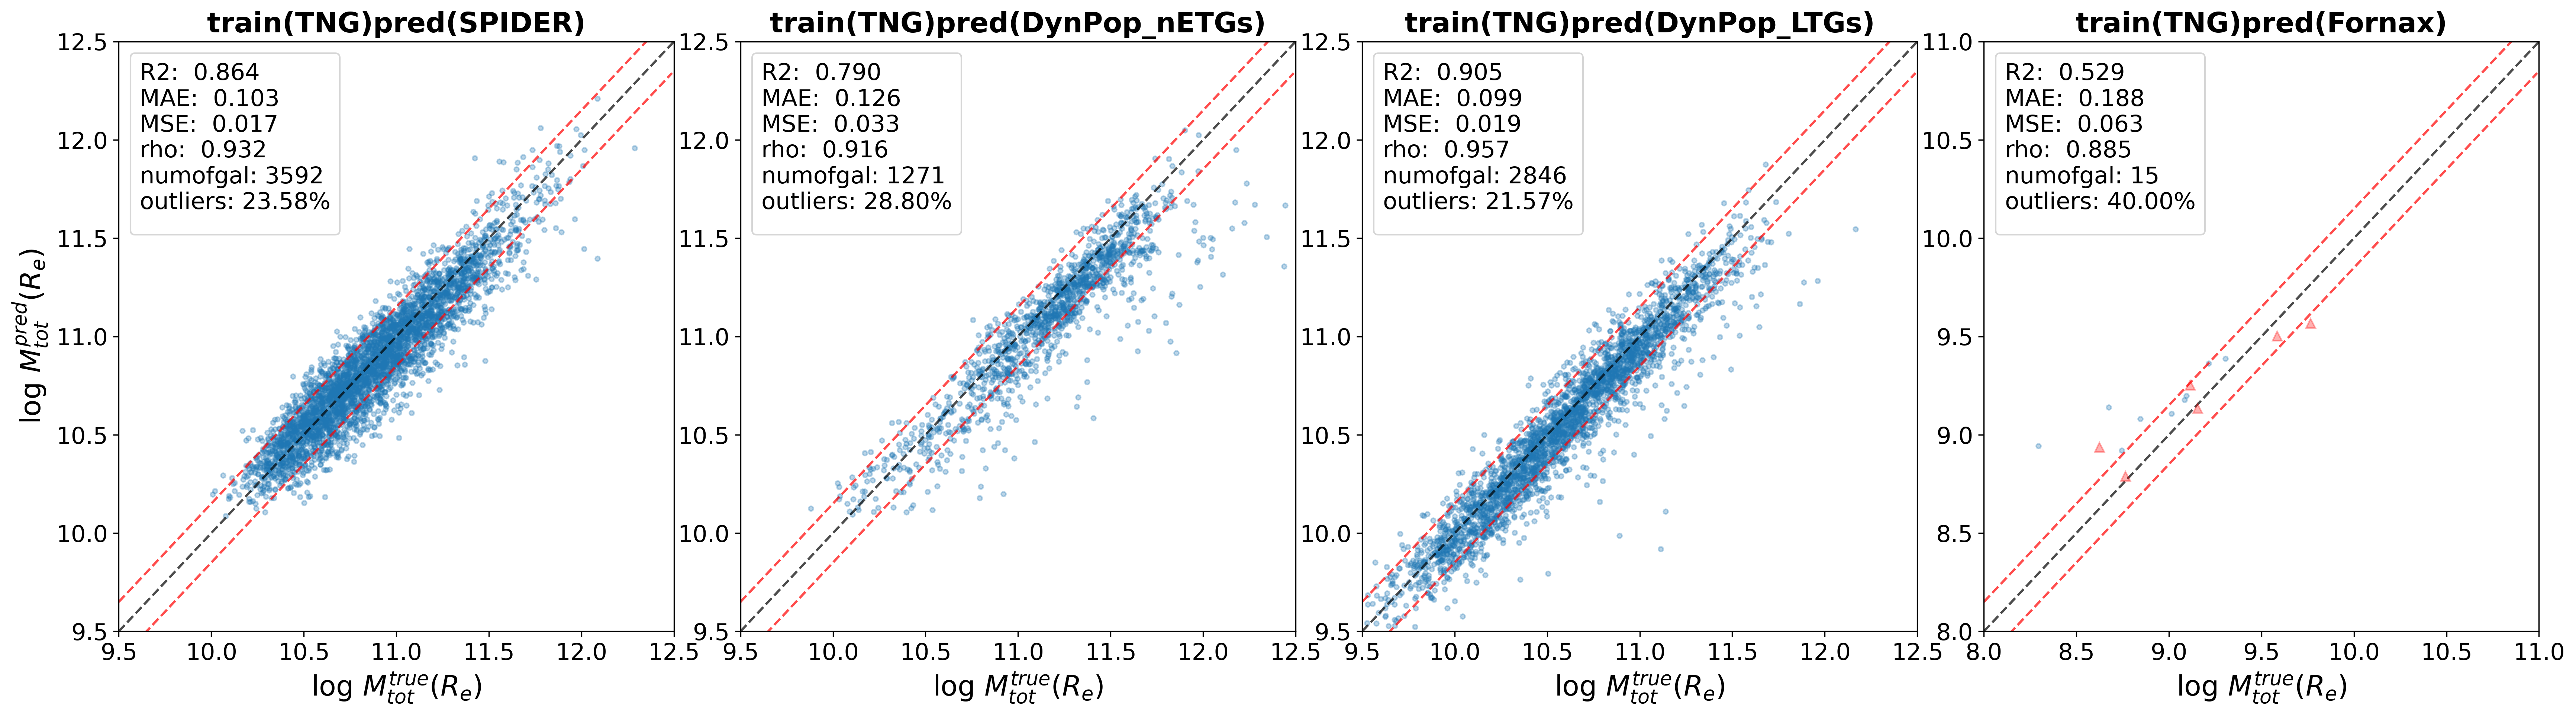

In [67]:
## predict
name_ls=['train(TNG)pred(SPIDER)','train(TNG)pred(DynPop_nETGs)','train(TNG)pred(DynPop_LTGs)','train(TNG)pred(Fornax)']
axmode_ls=['N','N','N','D']
target_name='tot'
axlim_dict={'N':[9.5,12.5],'D':[8,11]}
dex=0.15
# savefig_name='pic202305/train-simu-pred-real-withErr.png'
# savefig_name='pic202305/train-simu-pred-real.png'
true_ls=[spider[target].values,DynPop_nETGs[target].values,DynPop_LTGs[target].values,Fornax[target].values]
pred_ls=[]
pred_ls.append(MELA_all_tot.predict(spider[feature_ls].values))
pred_ls.append(MELA_all_tot.predict(DynPop_nETGs[feature_ls].values))
pred_ls.append(MELA_all_tot.predict(DynPop_LTGs[feature_ls].values))
pred_ls.append(MELA_all_tot.predict(Fornax[feature_ls].values))

nrow,ncol,size=1,4,7
plt.figure(figsize=(ncol*size,nrow*size),facecolor='white')
for i in range(len(true_ls)):
    true,pred=true_ls[i],pred_ls[i]
    axmode=axmode_ls[i]
    x,l1,l2=test_line(axlim_dict[axmode],dex)
    result_array=np.zeros(5)
    result_array[:-1]=get_evaluate(true,pred)
    result_array[-1]=len(true)
    intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)

    df=pd.DataFrame()
    df['true']=true
    df['pred']=pred
    outliers_frac_str='\noutliers: {:.2%}'.format(len(df.query('pred>true+{} or pred<true-{}'.format(dex,dex)).copy())/len(df))
    

    plt.subplot(nrow,ncol,i+1)
    plt.plot(true,pred,'.',alpha=0.3,label=None)
    # plt.plot(true,pred-true,'.',alpha=0.3,label=None)
    plt.plot(axlim_dict[axmode],axlim_dict[axmode],'k--',alpha=0.7)
    plt.plot(x,l1,'r--',alpha=0.7)
    plt.plot(x,l2,'r--',alpha=0.7)
    plt.xlim(axlim_dict[axmode])
    plt.ylim(axlim_dict[axmode])
    # plt.plot(axlim,[0,0],'k--')
    # plt.ylim(ylim)
    plt.legend(title=intro+outliers_frac_str,loc='upper left')
    plt.title(name_ls[i])
    if i==0:
        plt.xlabel('log '+'$M^{true}_{'+target_name+'}(R_e)$')
        plt.ylabel('log '+'$M^{pred}_{'+target_name+'}(R_e)$')
        # plt.ylabel('log '+'$M^{pred}_{'+target_name+'}(R_{eff})$-'+'log '+'$M^{true}_{'+target_name+'}(R_{eff})$')
    else:
        plt.xlabel('log '+'$M^{true}_{'+target_name+'}(R_e)$')
    # break
# plt.subplot(nrow,ncol,nrow*ncol)


true_ls=[Fornax_small[target].values]
pred_ls=[MELA_all_tot.predict(Fornax_small[feature_ls].values)]       # choose the right ML!!!
for i in range(len(true_ls)):
    true,pred=true_ls[i],pred_ls[i]
    result_array=np.zeros(5)
    result_array[:-1]=get_evaluate(true,pred)
    result_array[-1]=len(true)
    intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
    plt.subplot(nrow,ncol,i+4)
    plt.plot(true,pred,'r^',alpha=0.3,label=None)


# special for Fornax, exclude the 4 outliners
plt.subplot(nrow,ncol,ncol)
data=pd.concat([Fornax[['FDS-ID']+feature_ls+[target]],Fornax_small[['FDS-ID']+feature_ls+[target]]],axis=0)    
true=data[target].values
pred=MELA_all_tot.predict(data[feature_ls].values)                           # choose the right ML!!!
result_array[:-1]=get_evaluate(true,pred)
result_array[-1]=len(true)
data['true']=true
data['pred']=pred
intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
outliers_frac_str='\noutliers: {:.2%}'.format(len(data.query('pred>true+{} or pred<true-{}'.format(dex,dex)).copy())/len(data))
plt.legend(title=intro+outliers_frac_str)

# data['true']=true
# data['pred']=pred
# data_temp=data.query('true-{}<pred<true+{}'.format(dex,dex)).copy()       # exclude the 4 outlier 0.26
# true=data_temp['true'].values
# pred=data_temp['pred'].values
# result_array[:-1]=get_evaluate(true,pred)
# result_array[-1]=len(true)
# intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
# plt.text(10.0,8.5,intro)


plt.subplots_adjust(wspace=0.12)


# plt.axis('off')
# plt.tight_layout()
# plt.savefig(savefig_name)

In [71]:
feature_ls=['VelDisp','Mass','R_eff']
target='DM_MassInHalfRad'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


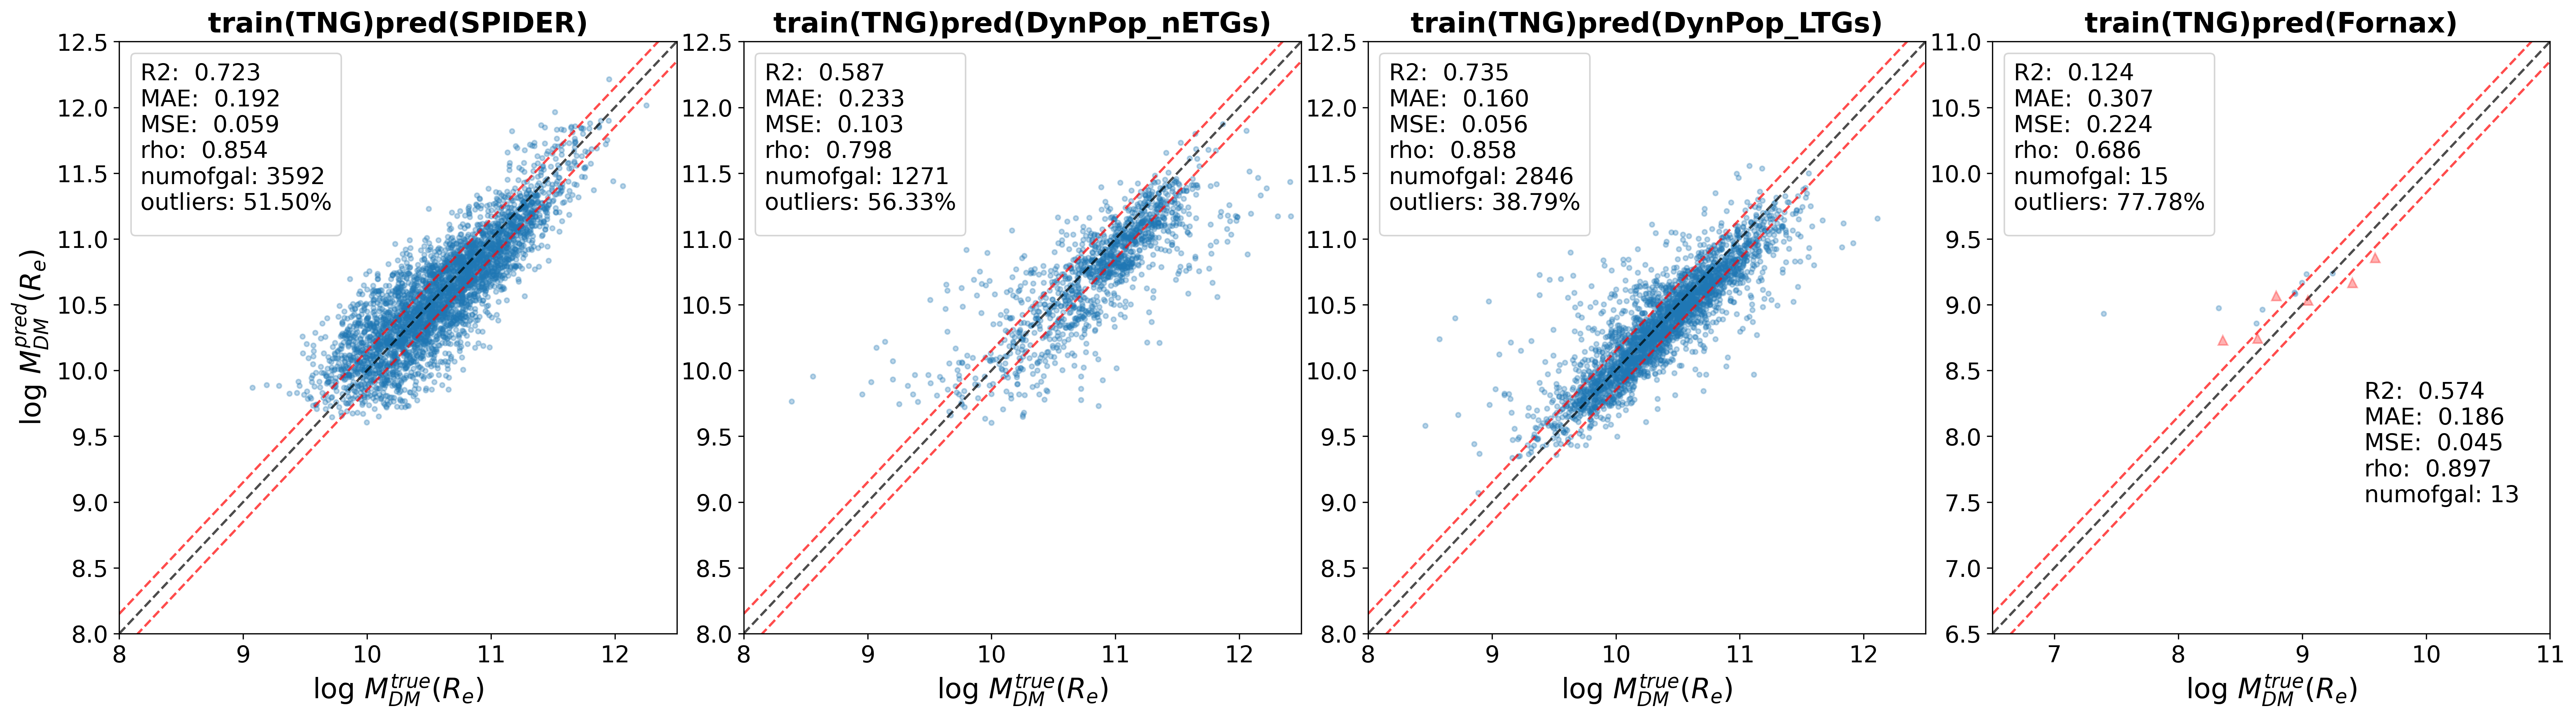

In [72]:
## predict
name_ls=['train(TNG)pred(SPIDER)','train(TNG)pred(DynPop_nETGs)','train(TNG)pred(DynPop_LTGs)',
         'train(TNG)pred(Fornax)']
axmode_ls=['N','N','N','D']
axlim_dict={'N':[8,12.5],'D':[6.5,11]}
target_name='DM'
dex=0.15
true_ls=[spider[target].values,DynPop_nETGs[target].values,DynPop_LTGs[target].values,Fornax[target]]
pred_ls=[]
pred_ls.append(MELA_all_DM.predict(spider[feature_ls].values))
pred_ls.append(MELA_all_DM.predict(DynPop_nETGs[feature_ls].values))
pred_ls.append(MELA_all_DM.predict(DynPop_LTGs[feature_ls].values))
pred_ls.append(MELA_all_DM.predict(Fornax[feature_ls].values))


nrow,ncol,size=1,4,7
plt.figure(figsize=(ncol*size,nrow*size),facecolor='white')
for i in range(len(true_ls)):
    true,pred=true_ls[i],pred_ls[i]
    axmode=axmode_ls[i]
    axlim=axlim_dict[axmode]
    x,l1,l2=test_line(axlim_dict[axmode],dex)

    result_array=np.zeros(5)
    result_array[:-1]=get_evaluate(true,pred)
    result_array[-1]=len(true)
    intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)

    df=pd.DataFrame()
    df['true']=true
    df['pred']=pred
    outliers_frac_str='\noutliers: {:.2%}'.format(len(df.query('pred>true+{} or pred<true-{}'.format(dex,dex)).copy())/len(df))

    plt.subplot(nrow,ncol,i+1)
    plt.plot(true,pred,'.',alpha=0.3,label=None)
    plt.plot(axlim,axlim,'k--',alpha=0.7)
    plt.plot(x,l1,'r--',alpha=0.7)
    plt.plot(x,l2,'r--',alpha=0.7)
    plt.xlim(axlim)
    plt.ylim(axlim)
    plt.legend(title=intro+outliers_frac_str,loc='upper left')
    plt.title(name_ls[i])
    if i==0:
        plt.xlabel('log '+'$M^{true}_{'+target_name+'}(R_e)$')
        plt.ylabel('log '+'$M^{pred}_{'+target_name+'}(R_e)$')
    else:
        plt.xlabel('log '+'$M^{true}_{'+target_name+'}(R_e)$')

true_ls=[Fornax_small[target].values]
pred_ls=[MELA_all_DM.predict(Fornax_small[feature_ls].values)]       # choose the right ML!!!
for i in range(len(true_ls)):
    true,pred=true_ls[i],pred_ls[i]
    result_array=np.zeros(5)
    result_array[:-1]=get_evaluate(true,pred)
    result_array[-1]=len(true)
    intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
    plt.subplot(nrow,ncol,i+4)
    plt.plot(true,pred,'r^',alpha=0.3,label=None)


# special for Fornax, exclude the 4 outliners
plt.subplot(nrow,ncol,ncol)
data=pd.concat([Fornax[feature_ls+[target]],Fornax_small[feature_ls+[target]]],axis=0)    
true=data[target].values
pred=MELA_all_DM.predict(data[feature_ls].values)                           # choose the right ML!!!
result_array[:-1]=get_evaluate(true,pred)
result_array[-1]=len(true)
intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
outliers_frac_str='\noutliers: {:.2%}'.format(len(df.query('pred>true+{} or pred<true-{}'.format(dex,dex)).copy())/len(df))
plt.legend(title=intro+outliers_frac_str)


data['true']=true
data['pred']=pred
data_temp=data.query('true-{}<pred<true+{}'.format(0.45,0.45)).copy()       # exclude the 4 outlier 0.26
true=data_temp['true'].values
pred=data_temp['pred'].values
result_array[:-1]=get_evaluate(true,pred)
result_array[-1]=len(true)
intro='R2: {:>6.3f}\nMAE: {:>6.3f}\nMSE: {:>6.3f}\nrho: {:>6.3f}\nnumofgal: {:.0f}'.format(*result_array)
plt.text(9.5,7.5,intro)

plt.subplots_adjust(wspace=0.12)
# plt.savefig(savefig_name)